# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('states_edu.csv')

print(df.head())
print(df.columns)

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    }, axis=1, inplace=True)

print(df.isna().sum())

df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset?

In [5]:

print(f"Range of years in the dataset: {df['YEAR'].min()} - {df['YEAR'].max()}")

# Calculate the total number of unique years in the dataset
years_logged = df['YEAR'].nunique()
print(f"Number of years logged in the dataset: {years_logged}")

Range of years in the dataset: 1990 - 2019
Number of years logged in the dataset: 13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [6]:
michigan_avg = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean()
ohio_avg = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()

print(f" {michigan_avg}")
print(f" {ohio_avg}")

 276.1666666666667
 282.25


Find the average for your chosen test across all states in 2019

In [7]:
avg_2019 = df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()
print(f"{avg_2019}")

281.2641509433962


For each state, find a maximum value for your chosen test score

In [8]:
max_scores_by_state = df.groupby('STATE')['AVG_MATH_8_SCORE'].max()
print(max_scores_by_state)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [9]:
df['EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
print(df[['STATE', 'EXPENDITURE_PER_STUDENT']].head())


        STATE  EXPENDITURE_PER_STUDENT
0     ALABAMA                 2.025197
2     ARIZONA                 2.132082
3    ARKANSAS                 2.184247
4  CALIFORNIA                 2.732512
5    COLORADO                 2.680986


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

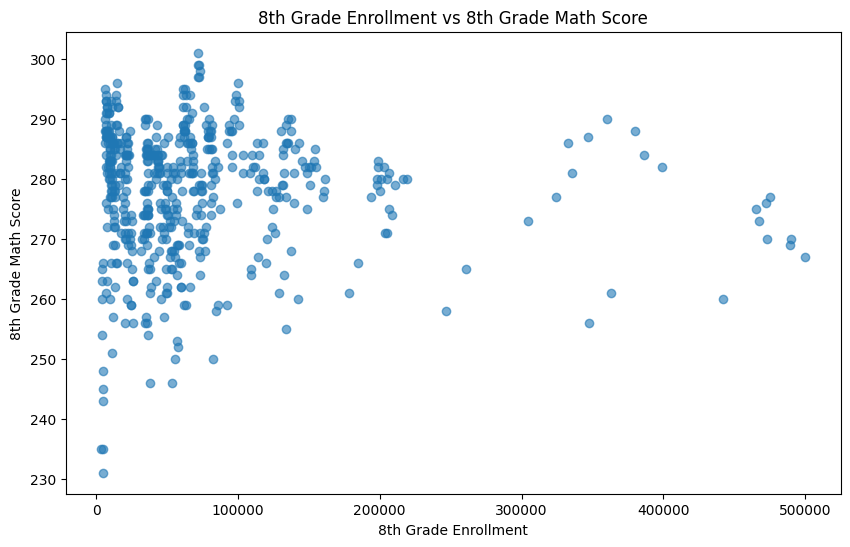

In [10]:
# Visualization 1: Relationship between 8th Grade Math Score and 8th Grade Enrollment
plt.figure(figsize=(10,6))
plt.scatter(df['ENROLL_8'], df['AVG_MATH_8_SCORE'], alpha=0.6)
plt.title('8th Grade Enrollment vs 8th Grade Math Score')
plt.xlabel('8th Grade Enrollment')
plt.ylabel('8th Grade Math Score')
plt.show()

**<CAPTION FOR VIZ 1>**

**Visualization 2**

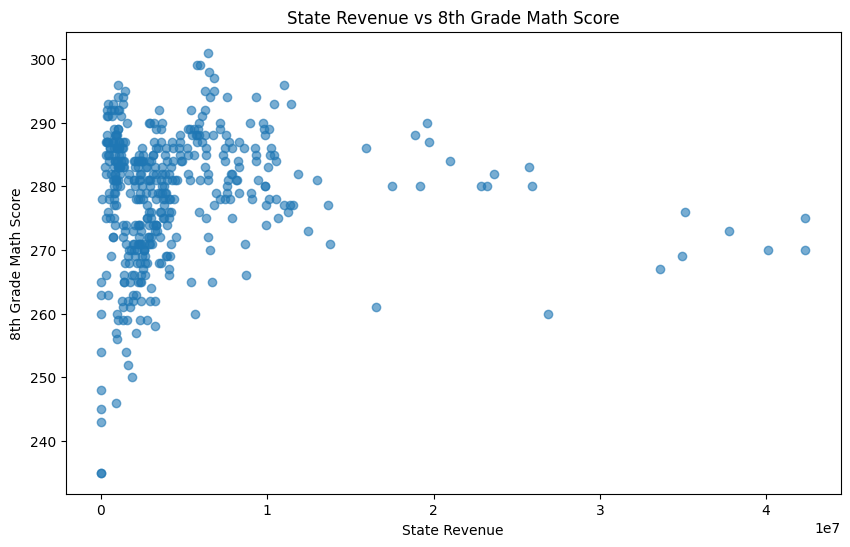

In [11]:
# Visualization 2: Relationship between 8th Grade Math Score and State Revenue
plt.figure(figsize=(10,6))
plt.scatter(df['STATE_REVENUE'], df['AVG_MATH_8_SCORE'], alpha=0.6)
plt.title('State Revenue vs 8th Grade Math Score')
plt.xlabel('State Revenue')
plt.ylabel('8th Grade Math Score')
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split

In [13]:

X = df[['ENROLL_8', 'STATE_REVENUE', 'AVG_READING_4_SCORE']].dropna()  # Using Enrollment, State Revenue, and Grade 4 Reading Score as predictors
y = df.loc[X.index]['AVG_MATH_8_SCORE']  # Target variable is the Grade 8 Math Score


In [14]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Check the shape of the training and testing sets
print(X_train.shape, X_test.shape)

(279, 3) (120, 3)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [15]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [16]:
# create your model here
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 49.19106885588363
Coefficients: [-1.55681152e-05  2.57144511e-07  1.04952706e+00]


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the R² score
r2 = model.score(X_test, y_test)
print(f"R² Score: {r2}")

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

R² Score: 0.7241103396918348
Mean Squared Error: 34.758342034007946
Mean Absolute Error: 4.62441994056364


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

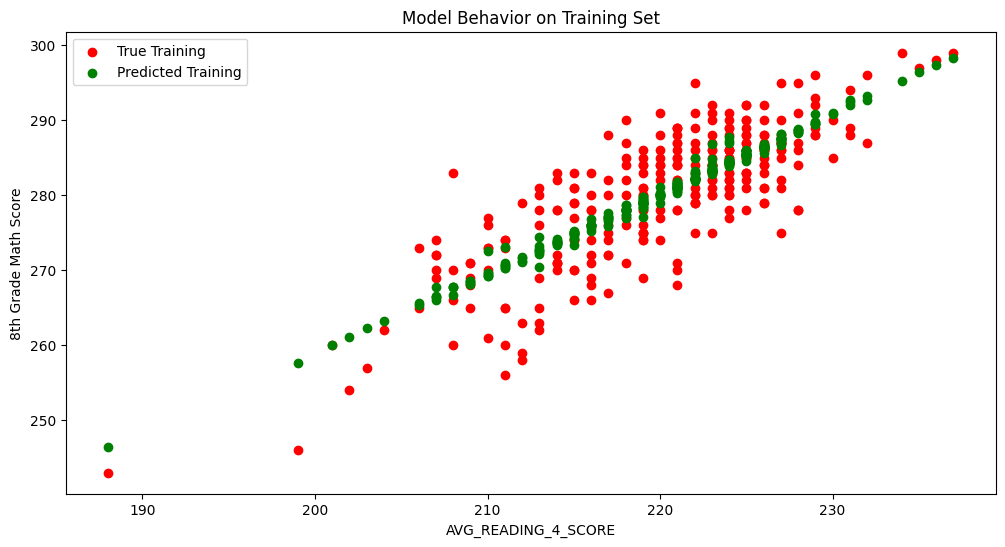

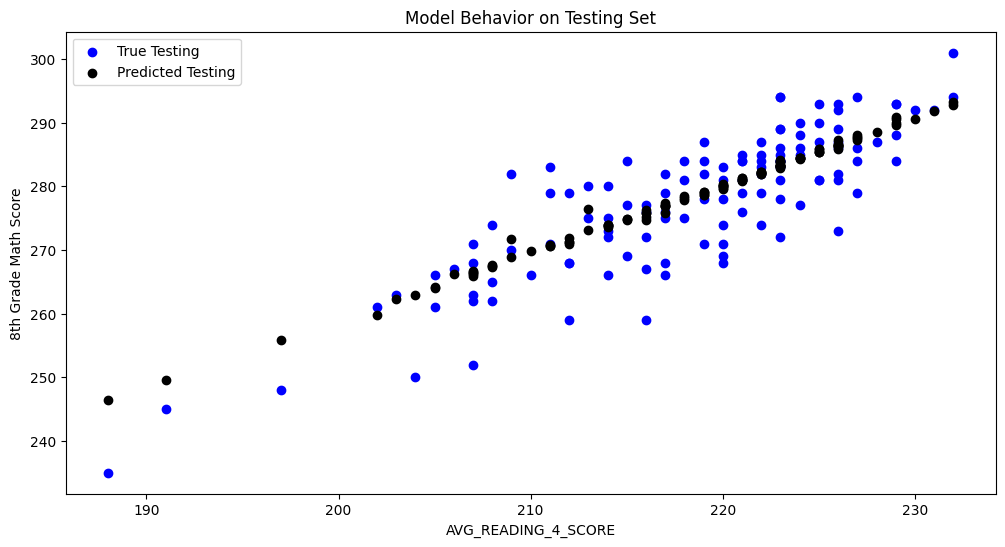

In [20]:
# Plot the true vs predicted values for one of the features, such as 'AVG_READING_4_SCORE'
col_name = 'AVG_READING_4_SCORE'

# Visualization for the training set
plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior on Training Set")
plt.show()

# Visualization for the test set
plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], y_pred, color = "black")
plt.legend(['True Testing', 'Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior on Testing Set")
plt.show()